In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu, ks_2samp, shapiro
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
import sys
import os
sys.path.append('../src')
from preprocess import HTRUPreprocessor
from utils import VisualizationUtils, StatisticalUtils

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 300

print("HTRU2 Pulsar Detection - Exploratory Data Analysis")
print("=" * 50)

HTRU2 Pulsar Detection - Exploratory Data Analysis


In [11]:
preprocessor = HTRUPreprocessor()
df = preprocessor.load_data("../data/HTRU_2.csv")

print(f"Dataset Shape: {df.shape}")
print(f"Features: {df.shape[1] - 1}")
print(f"Samples: {df.shape[0]:,}")
print("\nColumn names:")
print(df.columns.tolist())

INFO:preprocess:Loaded dataset with shape: (17898, 9)
INFO:preprocess:Class distribution: {0: np.int64(16259), 1: np.int64(1639)}


Dataset Shape: (17898, 9)
Features: 8
Samples: 17,898

Column names:
['Mean_Profile', 'Std_Profile', 'Excess_kurtosis_Profile', 'Skewness_Profile', 'Mean_DM', 'Std_DM', 'Excess_kurtosis_DM', 'Skewness_DM', 'Target']


In [12]:
print("\nBasic Dataset Information:")
print(f"• Total samples: {len(df):,}")
print(f"• Pulsar examples: {df['Target'].sum():,} ({df['Target'].mean()*100:.2f}%)")
print(f"• Non-pulsar examples: {len(df) - df['Target'].sum():,} ({100 - df['Target'].mean()*100:.2f}%)")
print(f"\nMissing values: {df.isnull().sum().sum()}")


Basic Dataset Information:
• Total samples: 17,898
• Pulsar examples: 1,639 (9.16%)
• Non-pulsar examples: 16,259 (90.84%)

Missing values: 0


INFO:utils:Data overview plot saved to ../results/figures/data_overview.png


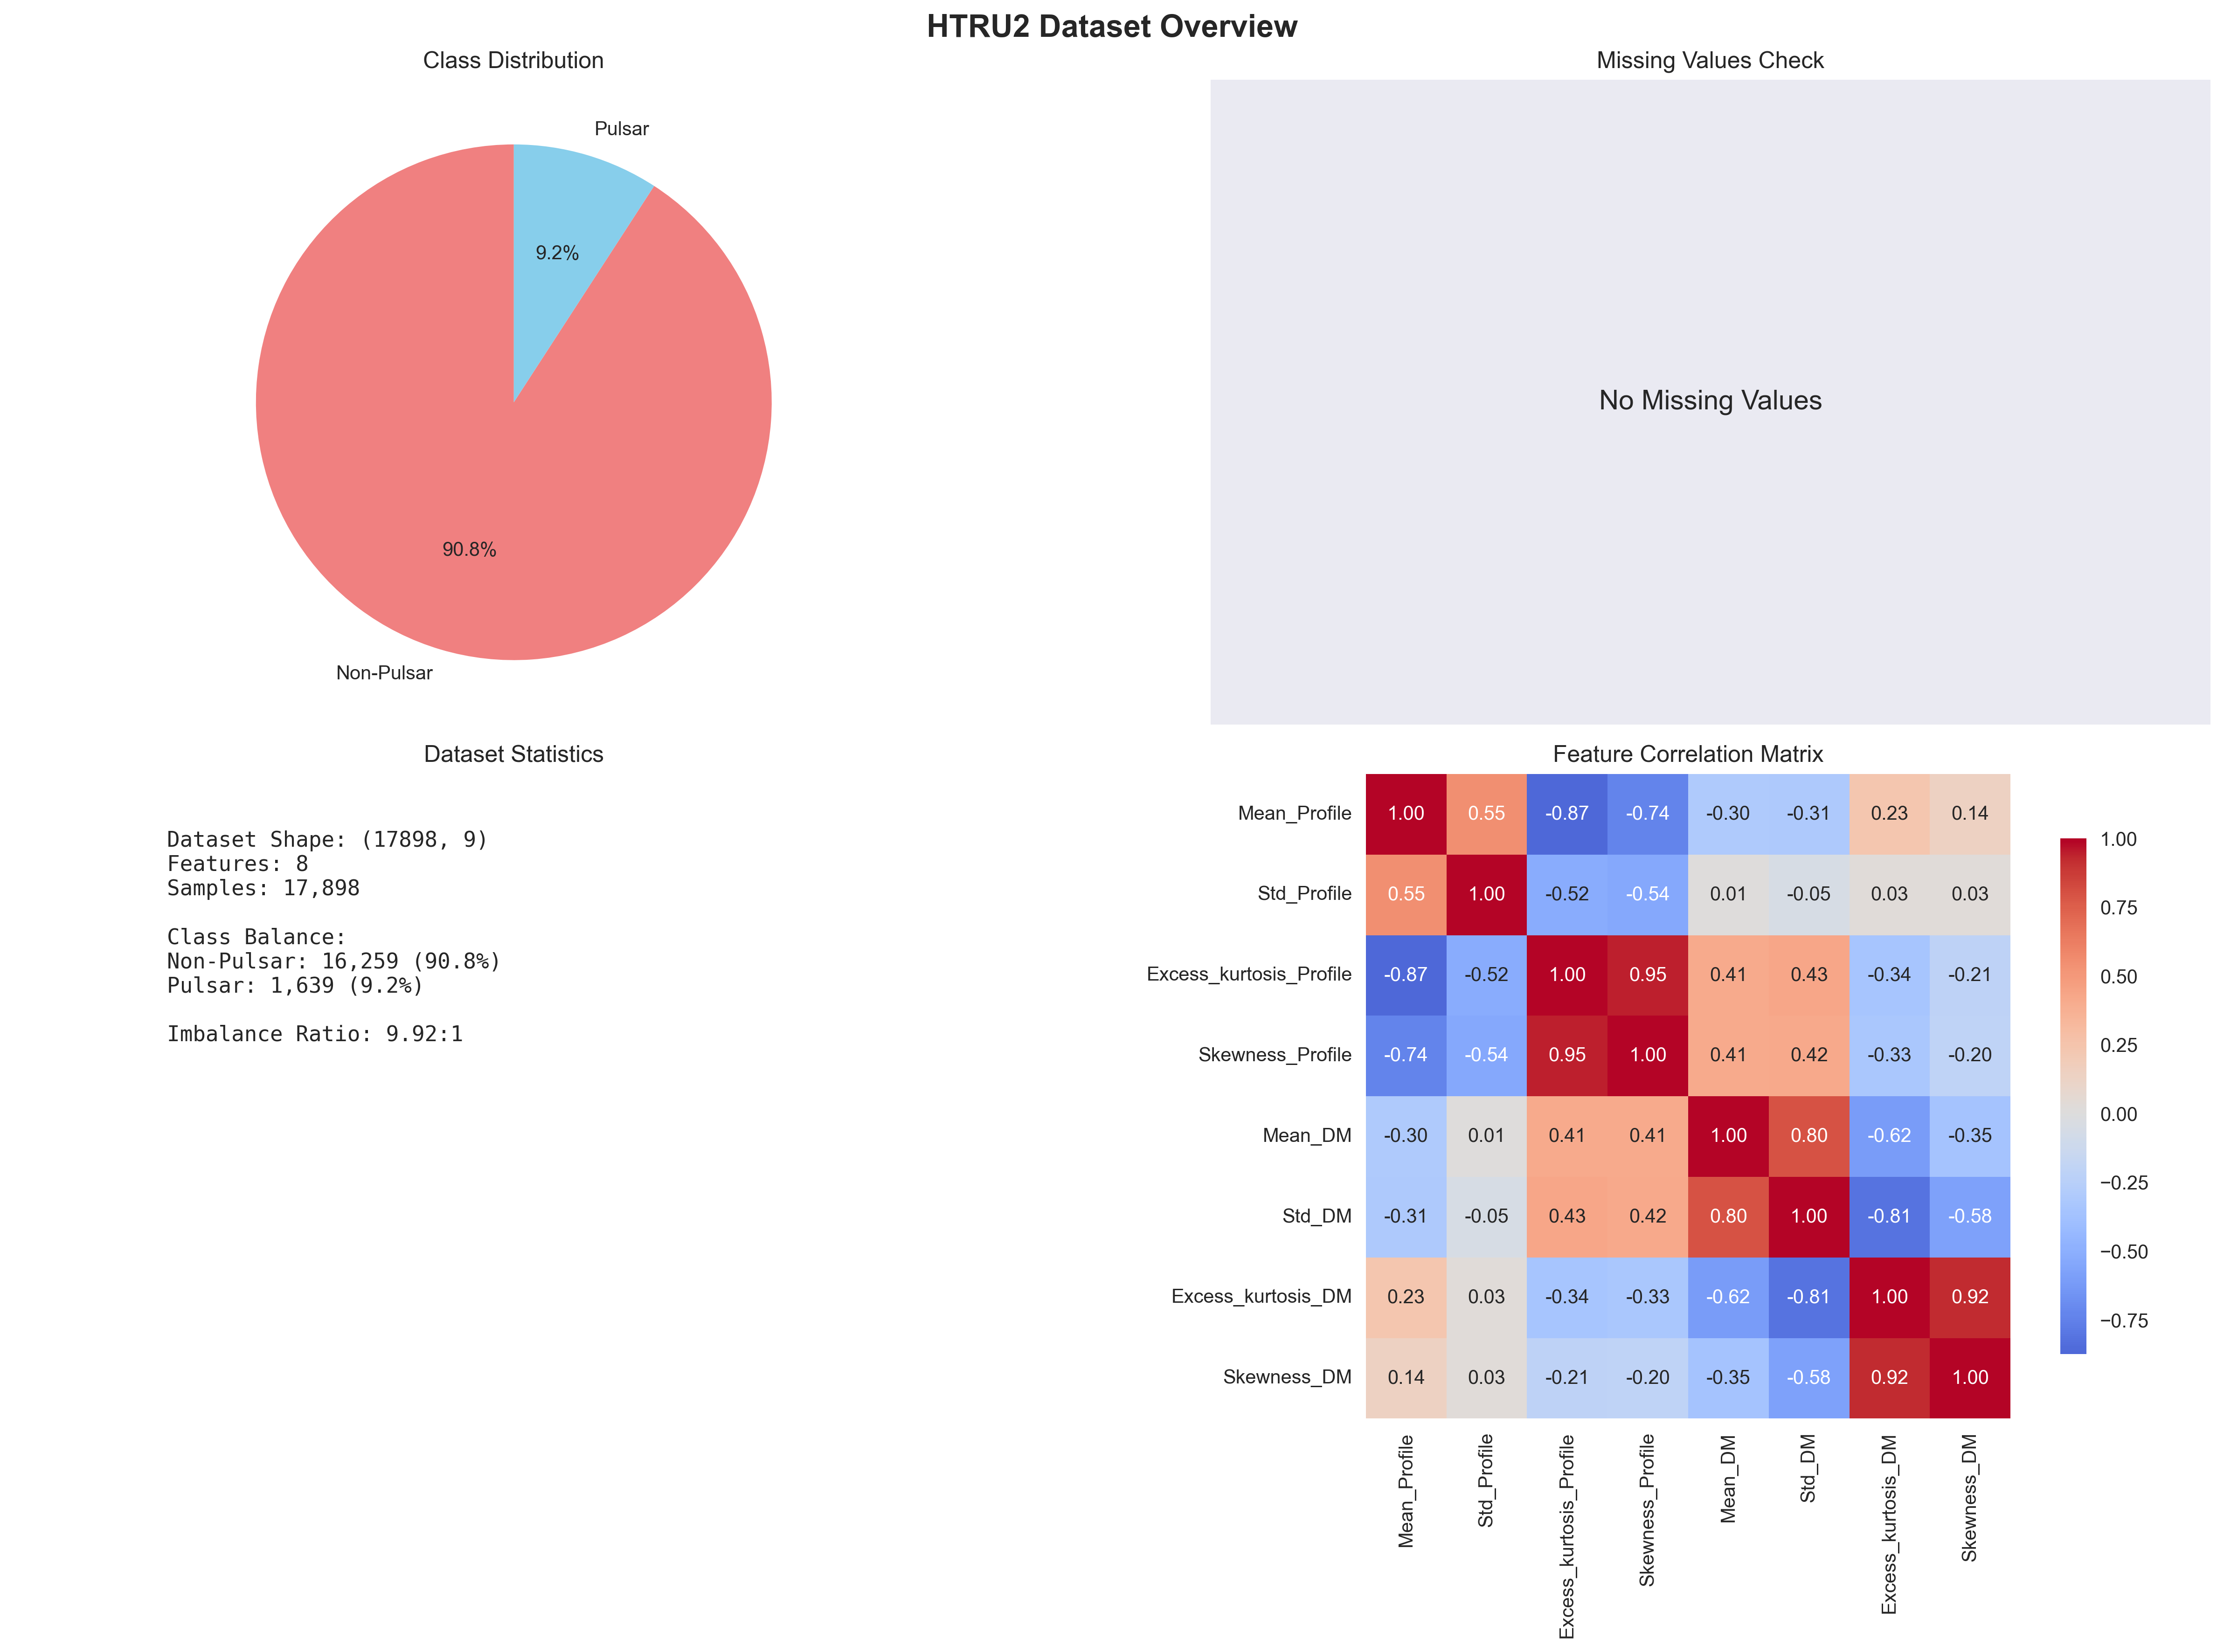

In [13]:
viz = VisualizationUtils()
viz.plot_data_overview(df, save_path="../results/figures/data_overview.png")


FEATURE DISTRIBUTIONS


INFO:utils:Feature distributions plot saved to ../results/figures/feature_distributions.png


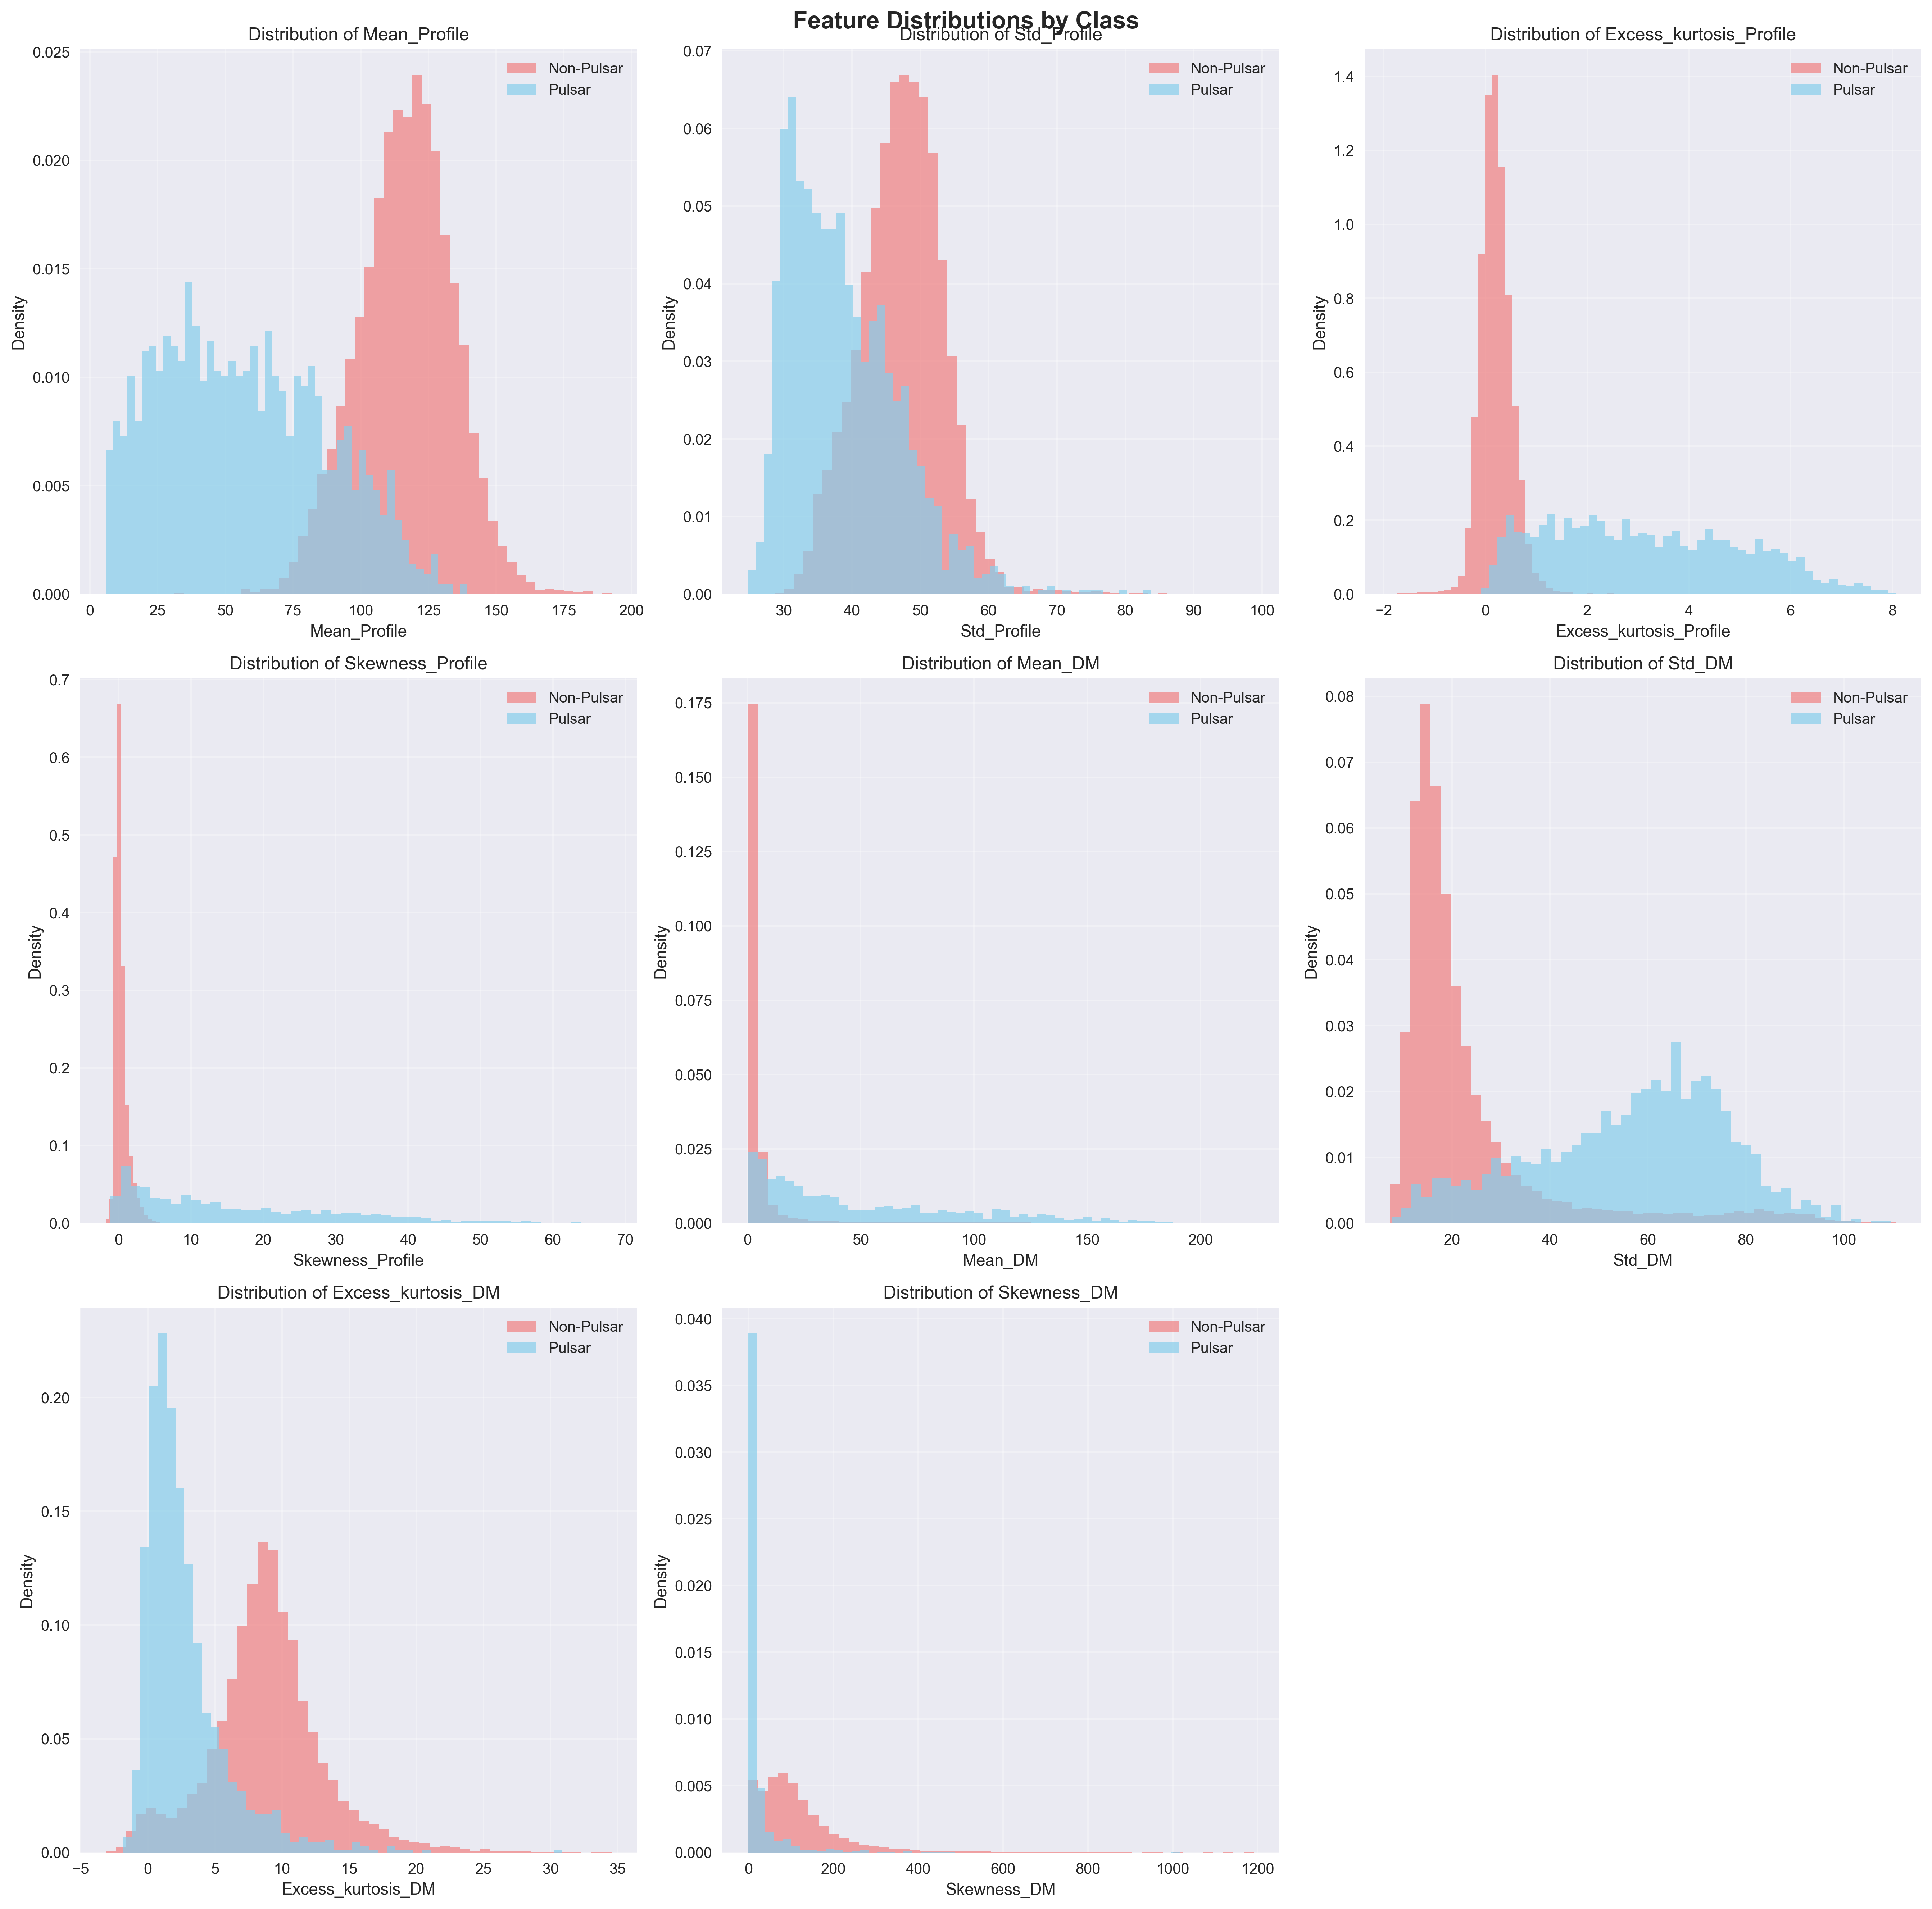

In [14]:
print("\n" + "="*50)
print("FEATURE DISTRIBUTIONS")
print("="*50)

# Plot feature distributions
viz.plot_feature_distributions(df, save_path="../results/figures/feature_distributions.png")

In [15]:
print("\n" + "="*50)
print("STATISTICAL SIGNIFICANCE TESTS")
print("="*50)

# Perform statistical tests
stats_utils = StatisticalUtils()
test_results = stats_utils.perform_statistical_tests(df, preprocessor.feature_names)

# Display significant results
significant_features = test_results[test_results['Significant_MW'] | test_results['Significant_KS']]
print("\nFeatures with significant differences between classes:")
print(significant_features[['Feature', 'MannWhitney_p_value', 'KS_p_value']])


STATISTICAL SIGNIFICANCE TESTS

Features with significant differences between classes:
                   Feature  MannWhitney_p_value  KS_p_value
0             Mean_Profile                  0.0         0.0
1              Std_Profile                  0.0         0.0
2  Excess_kurtosis_Profile                  0.0         0.0
3         Skewness_Profile                  0.0         0.0
4                  Mean_DM                  0.0         0.0
5                   Std_DM                  0.0         0.0
6       Excess_kurtosis_DM                  0.0         0.0
7              Skewness_DM                  0.0         0.0



FEATURE CORRELATION ANALYSIS


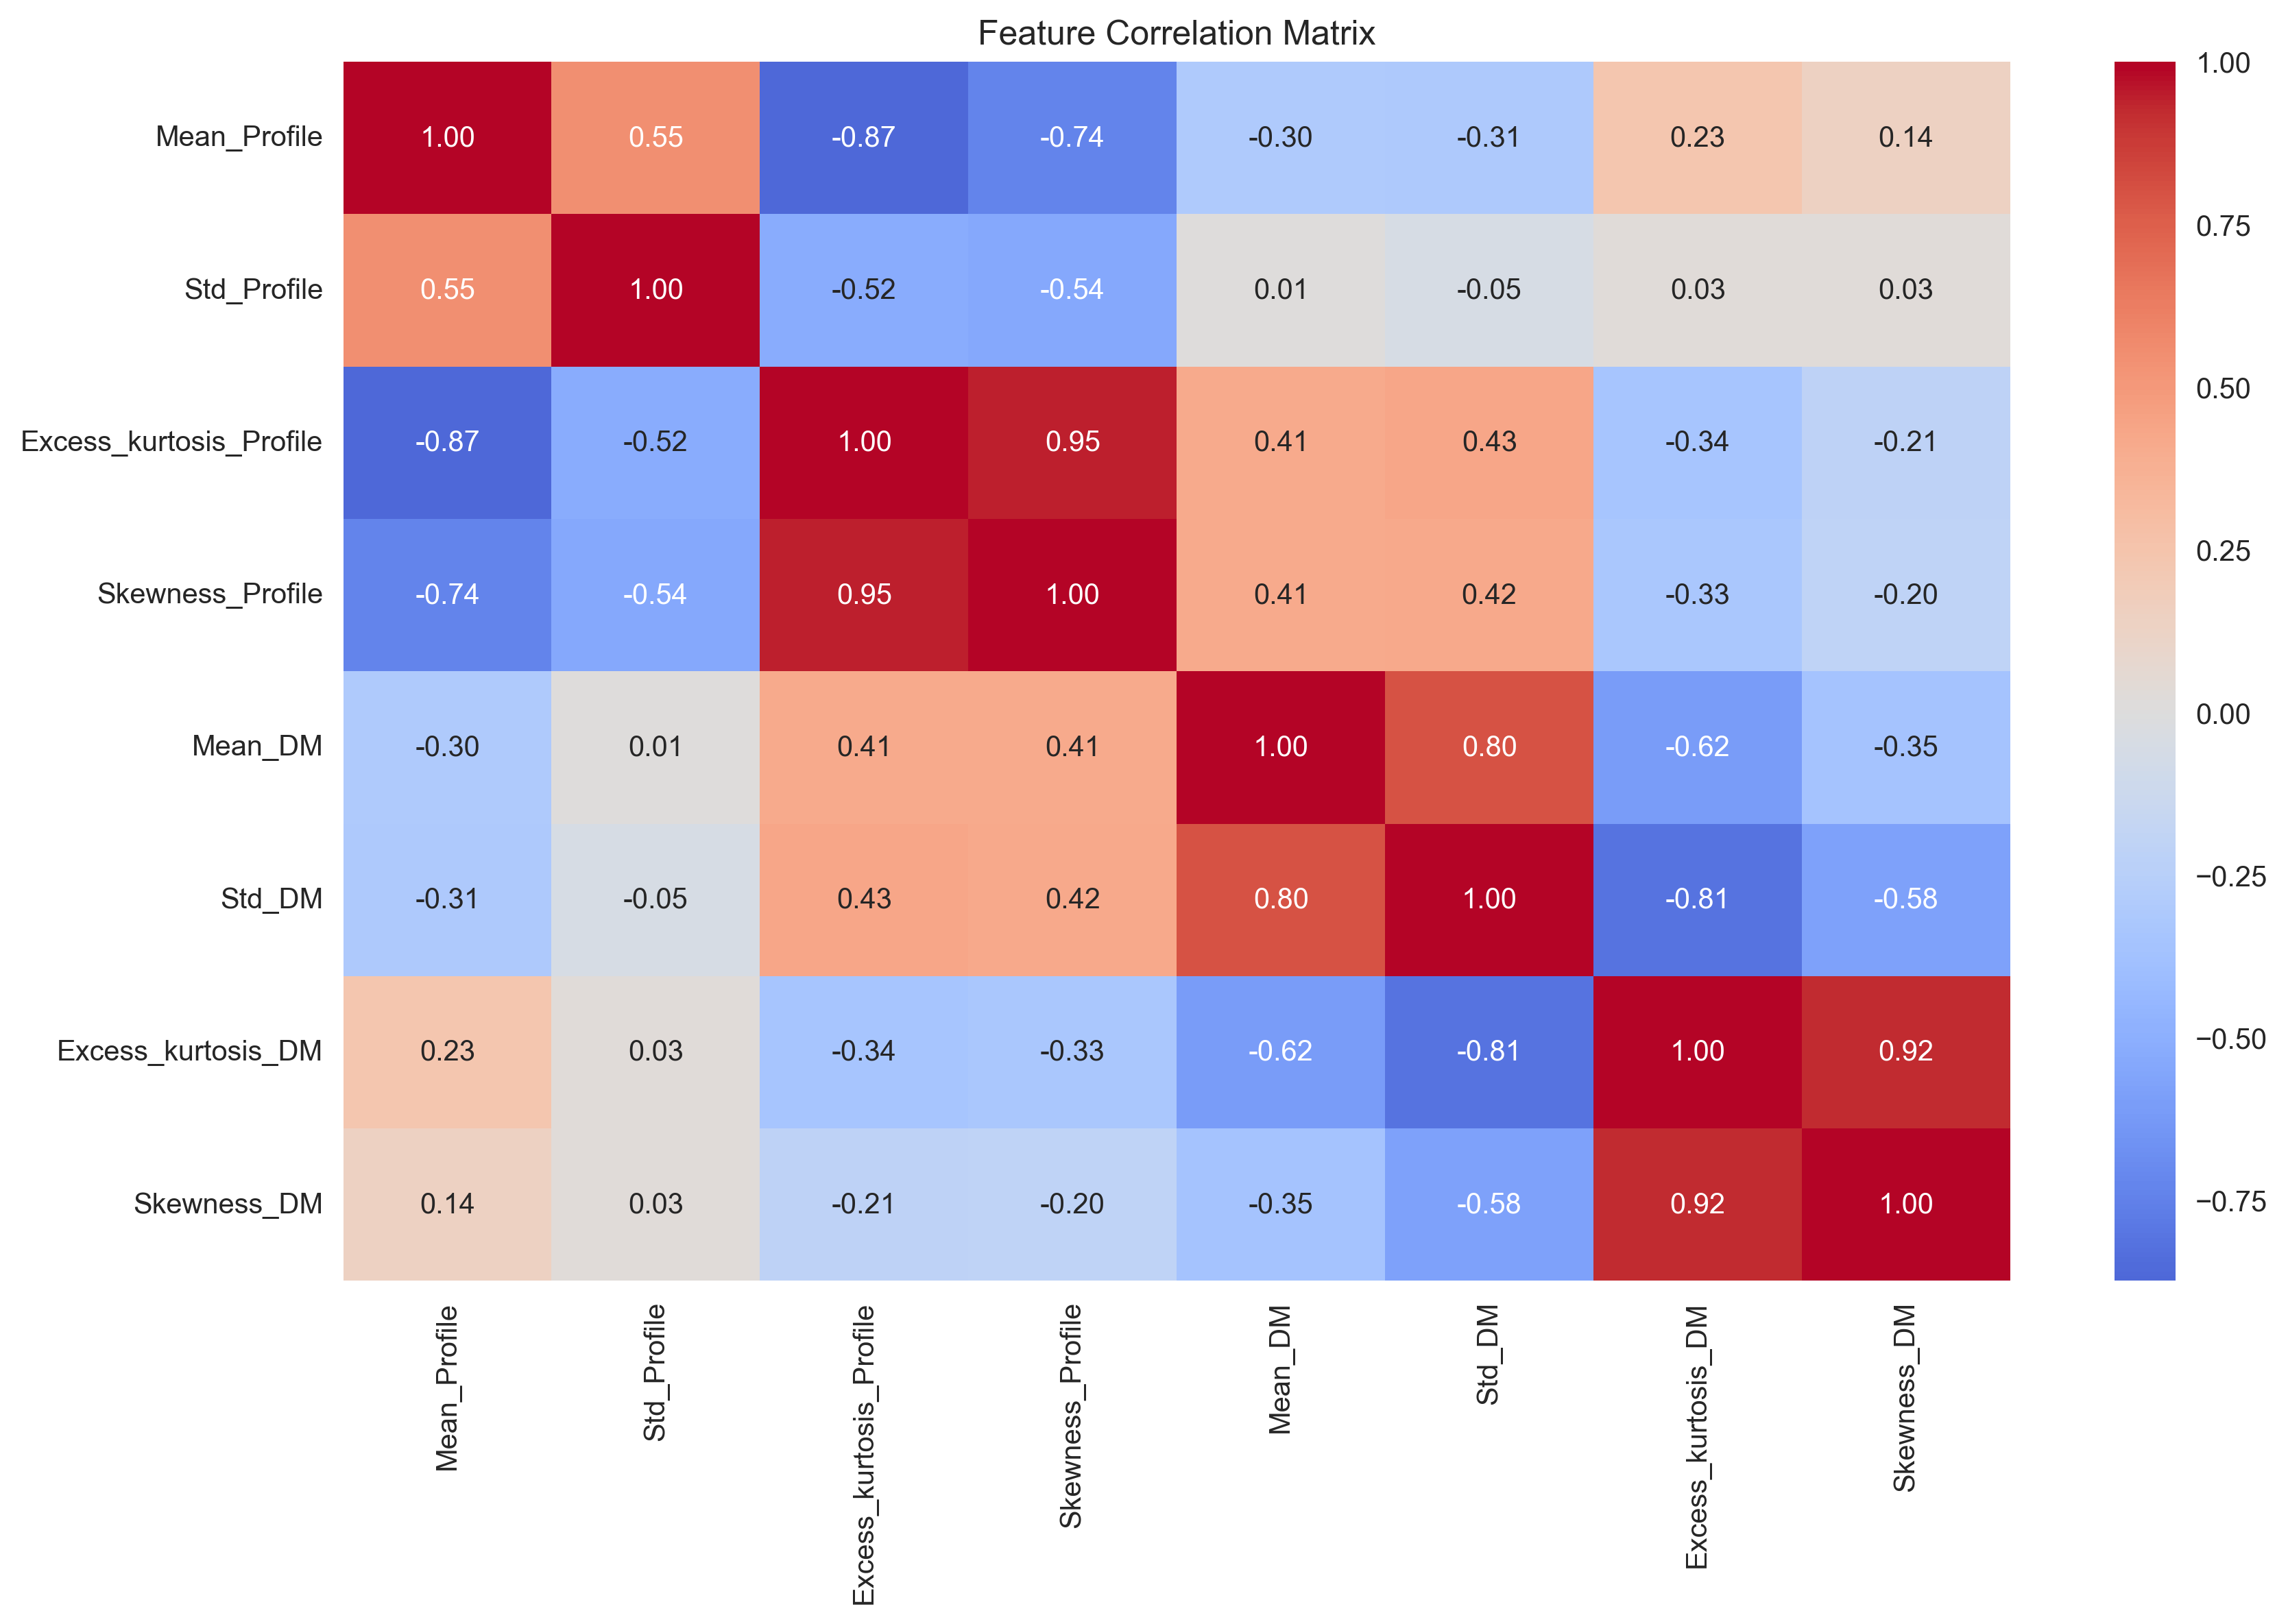


Highly correlated feature pairs (|r| > 0.7):
                    level_0                  level_1         0
19  Excess_kurtosis_Profile         Skewness_Profile  0.945729
26         Skewness_Profile  Excess_kurtosis_Profile  0.945729
62              Skewness_DM       Excess_kurtosis_DM  0.923743
55       Excess_kurtosis_DM              Skewness_DM  0.923743
2              Mean_Profile  Excess_kurtosis_Profile  0.873898
16  Excess_kurtosis_Profile             Mean_Profile  0.873898
46                   Std_DM       Excess_kurtosis_DM  0.809786
53       Excess_kurtosis_DM                   Std_DM  0.809786
37                  Mean_DM                   Std_DM  0.796555
44                   Std_DM                  Mean_DM  0.796555
24         Skewness_Profile             Mean_Profile  0.738775
3              Mean_Profile         Skewness_Profile  0.738775


In [16]:
print("\n" + "="*50)
print("FEATURE CORRELATION ANALYSIS")
print("="*50)

# Calculate correlations
corr_matrix = df[preprocessor.feature_names].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig("../results/figures/correlation_matrix.png", dpi=300)
plt.show()

# Identify highly correlated features
high_corr = corr_matrix.abs().stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
high_corr = high_corr.sort_values(0, ascending=False)
high_corr = high_corr[high_corr[0] > 0.7].drop_duplicates()

print("\nHighly correlated feature pairs (|r| > 0.7):")
print(high_corr)

INFO:preprocess:Starting data preprocessing pipeline...


INFO:preprocess:Loaded dataset with shape: (17898, 9)
INFO:preprocess:Class distribution: {0: np.int64(16259), 1: np.int64(1639)}
INFO:preprocess:Split sizes - Train: 12528, Val: 1790, Test: 3580
INFO:preprocess:Features scaled using standard scaler
INFO:preprocess:Data balanced using smote
INFO:preprocess:New class distribution: [11381 11381]
INFO:preprocess:Preprocessing pipeline completed successfully



DIMENSIONALITY REDUCTION ANALYSIS


INFO:utils:PCA analysis plot saved to ../results/figures/pca_analysis.png


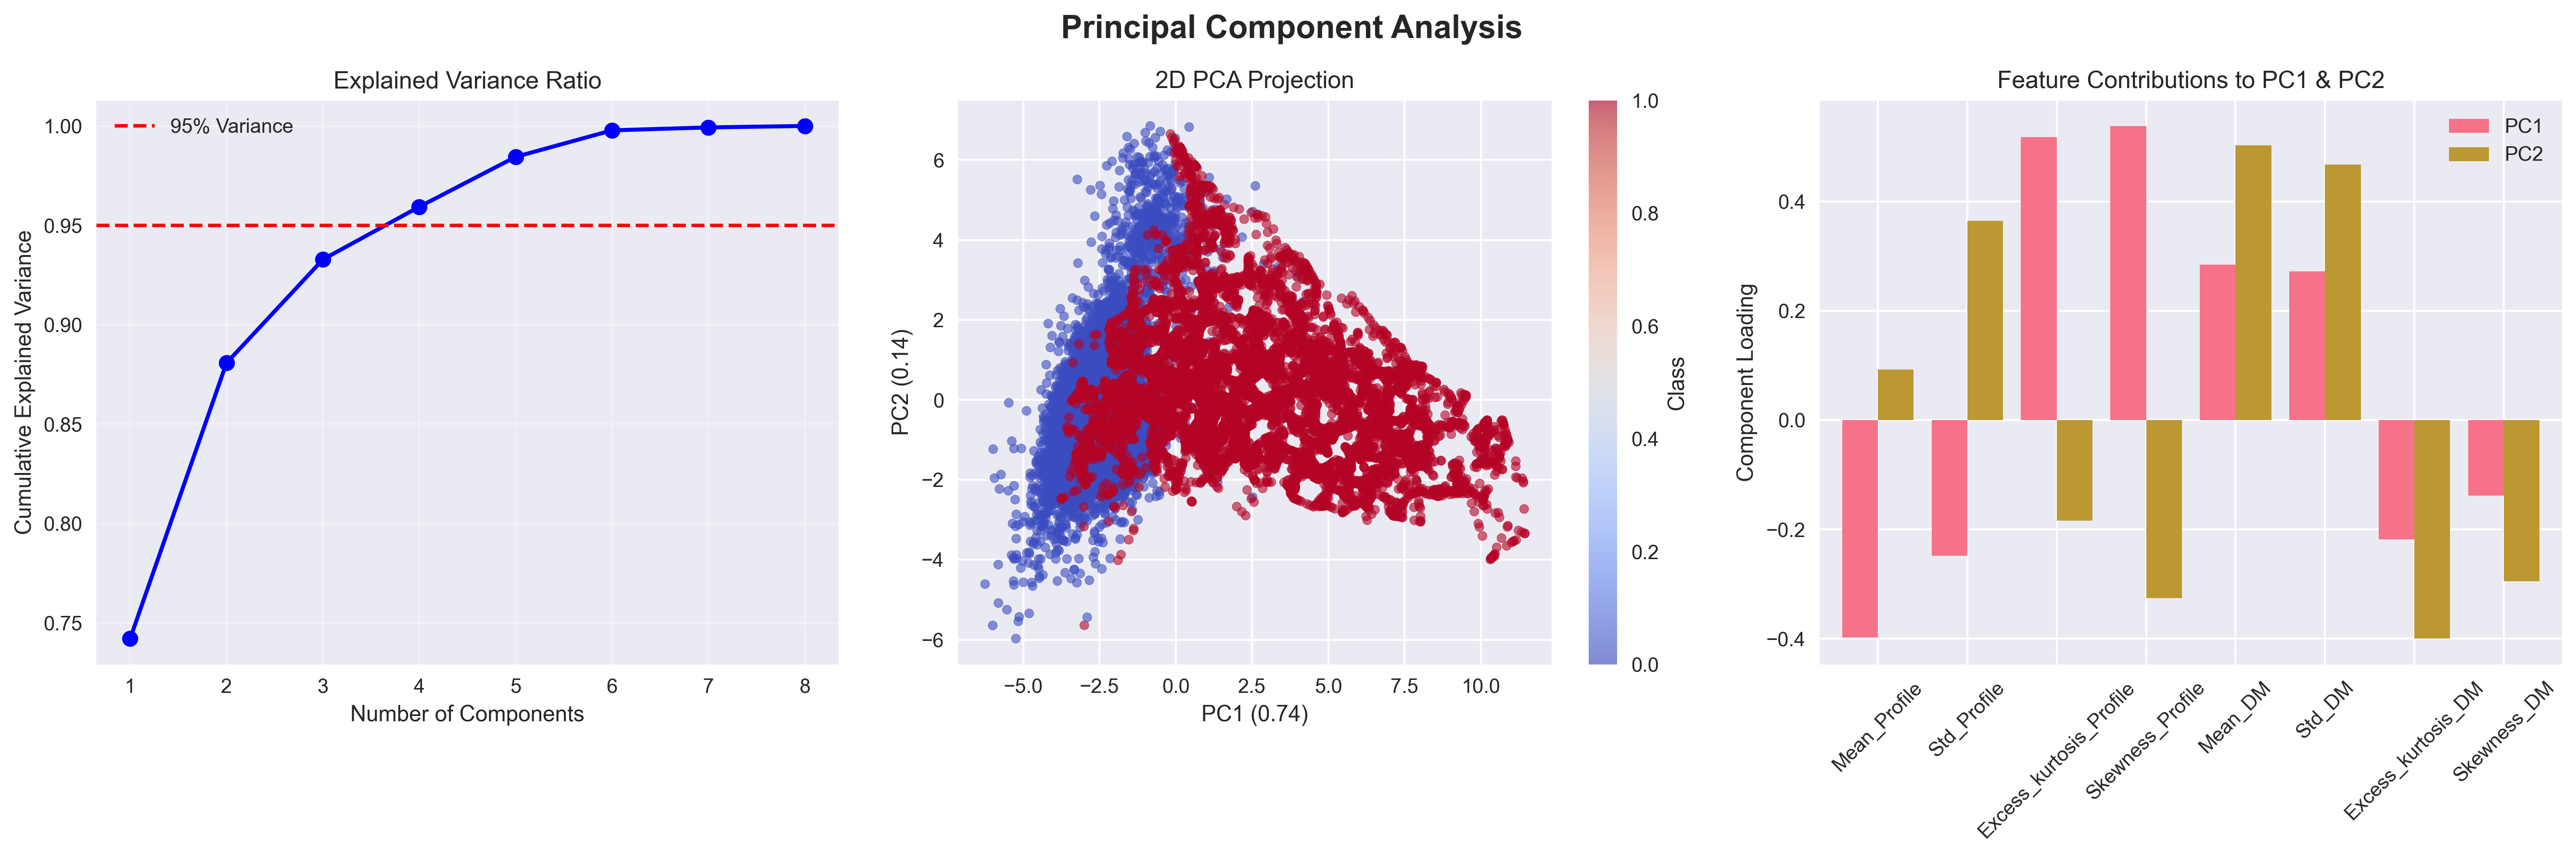

In [17]:
print("\n" + "="*50)
print("DIMENSIONALITY REDUCTION ANALYSIS")
print("="*50)

# Prepare scaled data
X_train, X_val, X_test, y_train, y_val, y_test = preprocessor.prepare_data()

# Plot PCA analysis
viz.plot_pca_analysis(X_train, y_train, save_path="../results/figures/pca_analysis.png")


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



FEATURE-TARGET RELATIONSHIPS


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

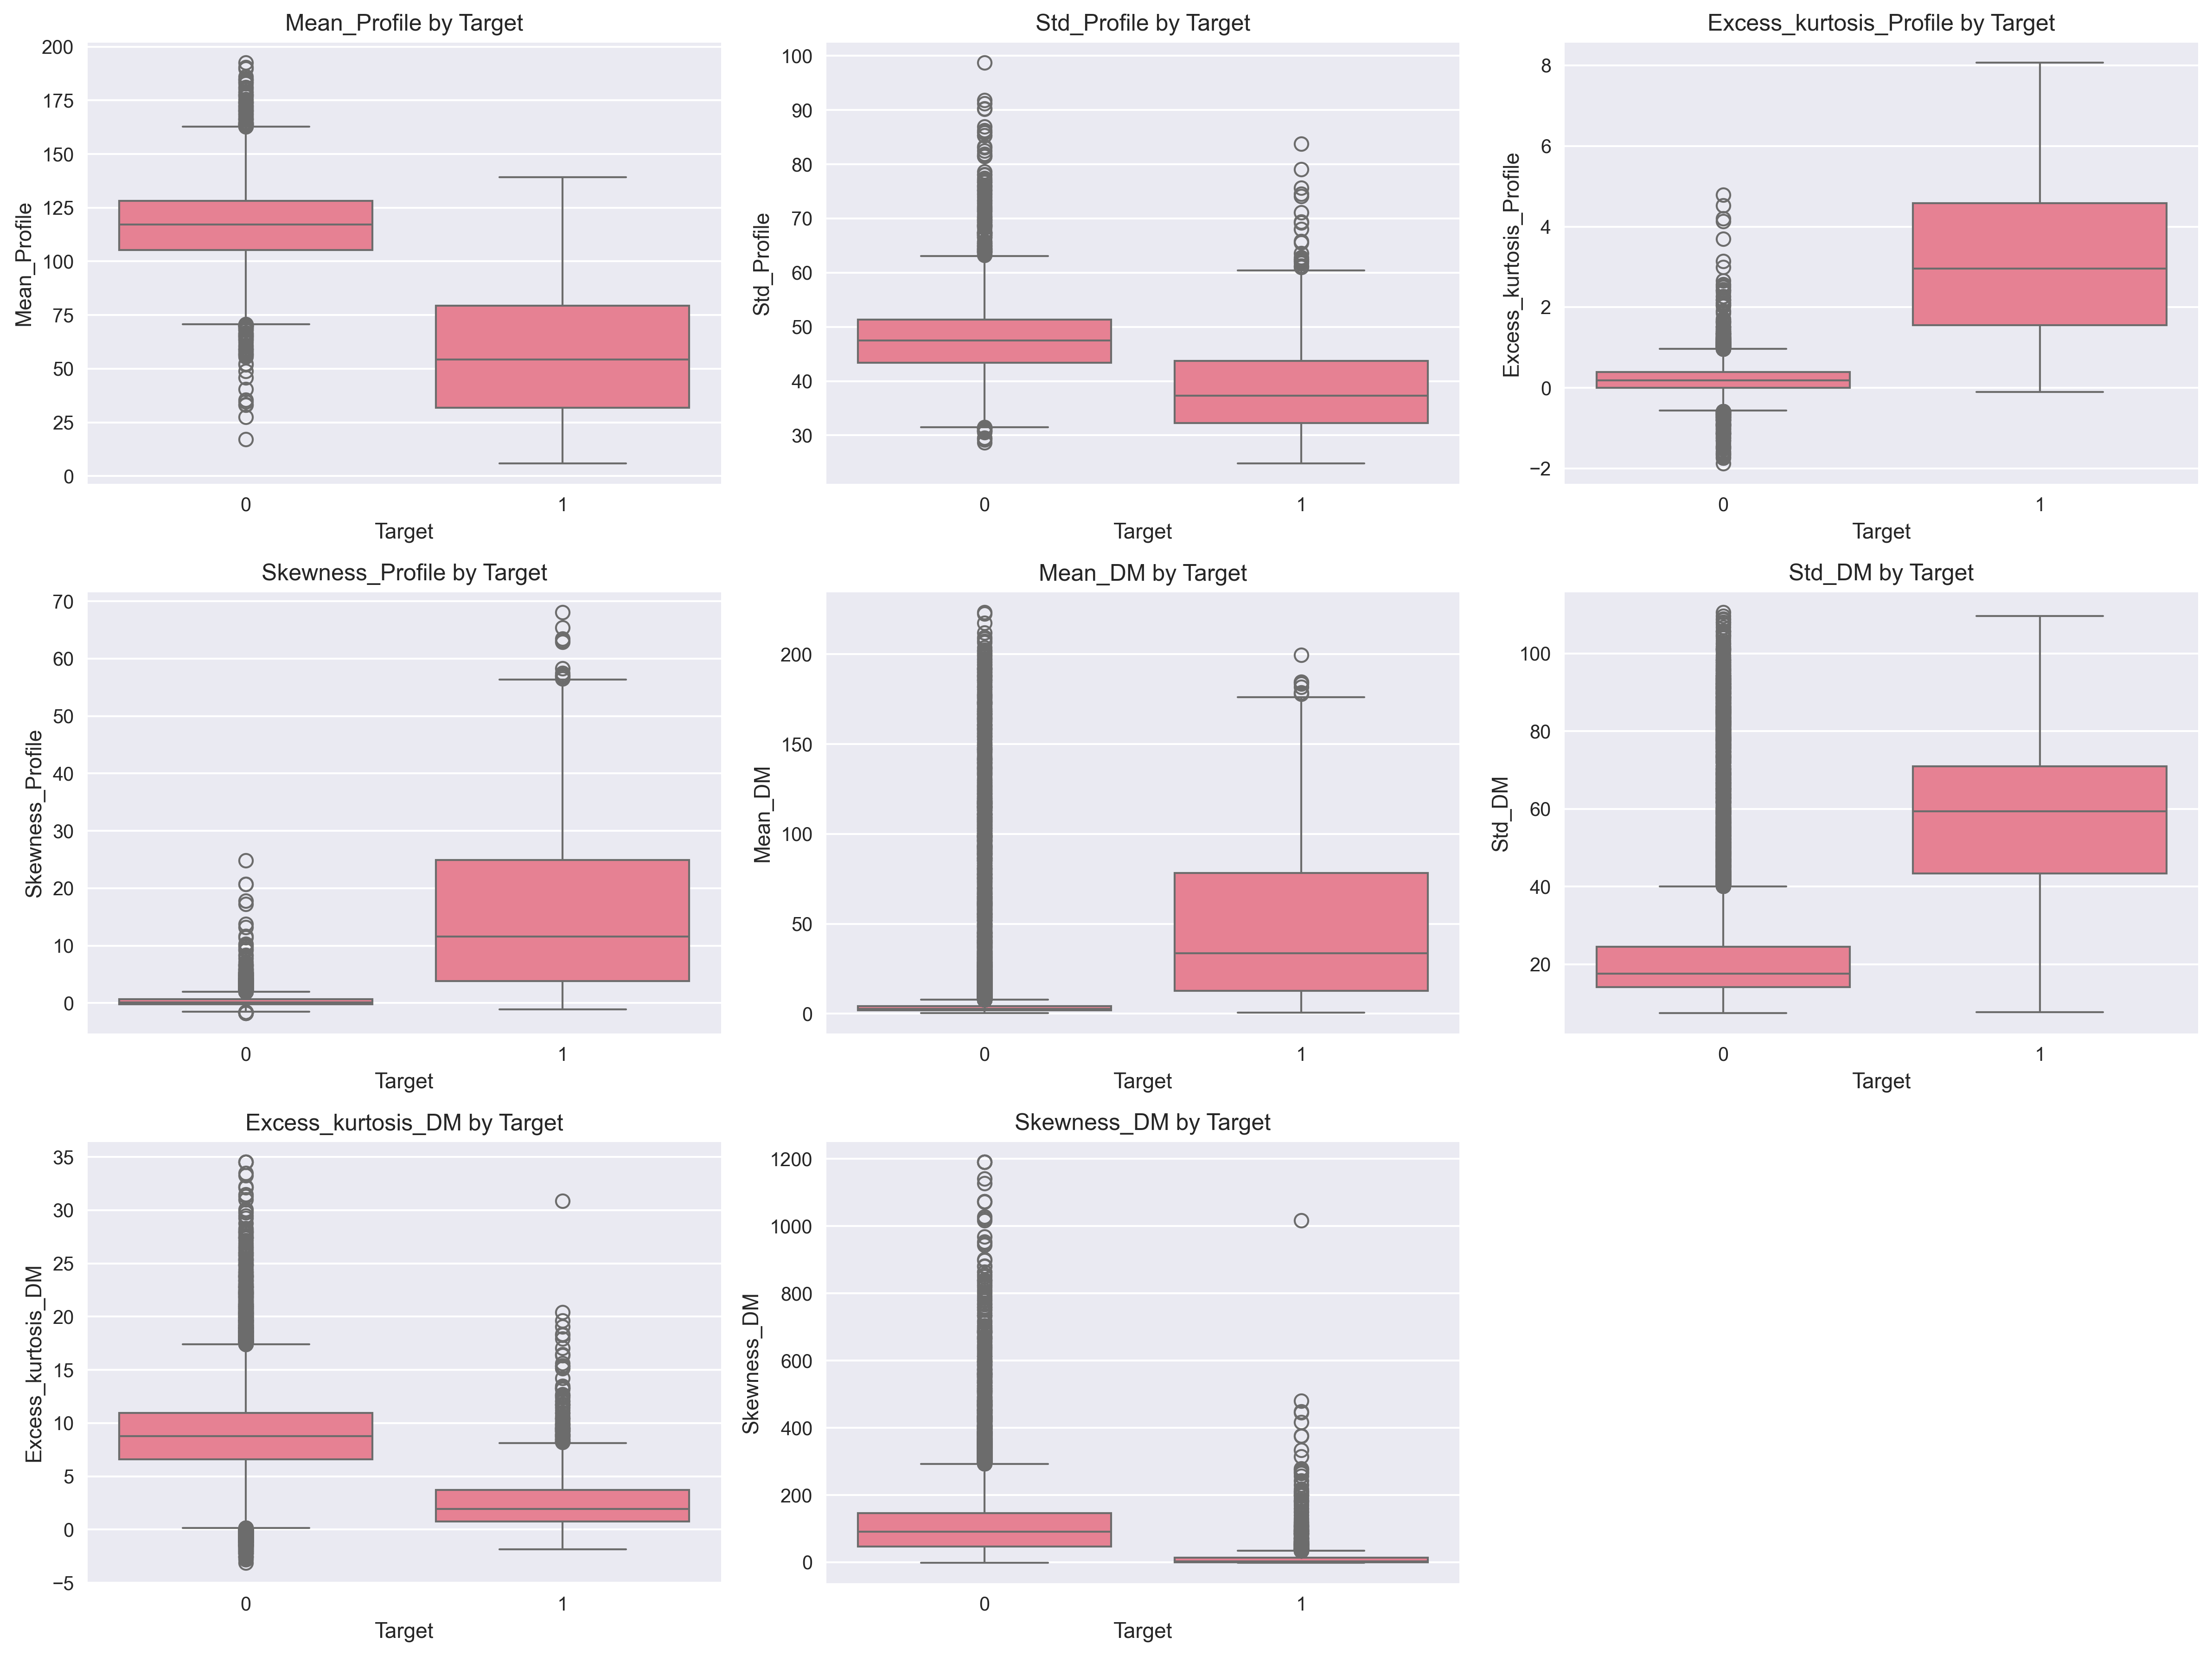

In [18]:
print("\n" + "="*50)
print("FEATURE-TARGET RELATIONSHIPS")
print("="*50)

# Plot boxplots for each feature by target
plt.figure(figsize=(16, 12))
for i, feature in enumerate(preprocessor.feature_names, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Target', y=feature, data=df)
    plt.title(f'{feature} by Target')
plt.tight_layout()
plt.savefig("../results/figures/feature_boxplots.png", dpi=300)
plt.show()


In [19]:
print("\n" + "="*50)
print("KEY FINDINGS FROM EDA")
print("="*50)

print("""
1. Class Imbalance:
   - Significant class imbalance (9:1 ratio of non-pulsars to pulsars)
   - Requires careful sampling or class weighting

2. Feature Distributions:
   - All features show significant differences between classes
   - Pulsars tend to have higher values in most features

3. Correlations:
   - Some moderate correlations between features
   - No extremely high correlations that would suggest redundancy

4. Dimensionality:
   - PCA shows good separation between classes in first two components
   - Most variance explained by first few components

5. Next Steps:
   - Proceed with modeling using all features
   - Consider class weighting or sampling techniques
   - Feature scaling will be important for many models
""")


KEY FINDINGS FROM EDA

1. Class Imbalance:
   - Significant class imbalance (9:1 ratio of non-pulsars to pulsars)
   - Requires careful sampling or class weighting

2. Feature Distributions:
   - All features show significant differences between classes
   - Pulsars tend to have higher values in most features

3. Correlations:
   - Some moderate correlations between features
   - No extremely high correlations that would suggest redundancy

4. Dimensionality:
   - PCA shows good separation between classes in first two components
   - Most variance explained by first few components

5. Next Steps:
   - Proceed with modeling using all features
   - Consider class weighting or sampling techniques
   - Feature scaling will be important for many models

